In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import tensorflow.keras as nn

# DEEP LEARNING 1 Exercises
Today we will practice the basics. First some Linear Algebra using numpy. Remember that working with vectors and matrices is a central skill in data science, and in particular in relation to not only deep learning but high dimensional data sources (networks, text and images). So grab the chance to brush up.

Secondly we shall practice our understanding of what actually goes on inside the neural network, here we shall practice reading network represenations of what can be called the computational graph that a neural network is. We will practice on small and simple networks, but understanding these basic mechanics is crucial before we can move towards more abstract representations of larger and more complex neural network architectures (Convulational neural networks, Recurrent Neural Networks, Transformers,  AutoEncoder), that we will look more into in the next lecture. 

Thirdly we will start practicing the mechanics of building and fitting a neural network model using the ```keras``` deep learning framework.

# 1 Linear Algebra
The purpose of these exercises is to practice linear algebra - vector and matrix (and tensor) operations - and to get acquinted with the ```
numpy``` library for doing vector and matrix operations.

Vector and matrix operations are central to among other things deep learning. Operations such as Dot product, and Matrix Inversion can be thought of as ```for``` loops describing simple operations of addition and multiplication, in a specific order related to the rows and columns.

Here we practice the mechanics both by implementing them as ```for```-loops and using the ```numpy``` python package.

## Intro (SKIP if superflous)
### Vectors and Matrices
In ```
numpy```, we use the ```
numpy.array``` to represent both vectors and matrices. Arrays are like lists, they are just indexed containers for any object, however they have a fixed size. 
If an array contain only numbers (scalars), it is a vector.
```python
a = np.array([4,3,2,1])# a is a vector
```
Vectors values can be accesed using standard list notation:
```python
a[0]
> 4
a[-1]
> 1
```

### Matrices
If an array contains a list of vectors of equal size (same length) it is a matrix. In this regard we can think of matrices simply as lists of lists.
```python
M = np.array([[1,2,3,4],
              [3,4,5,6],
              [2,3,1,0]])# M is a Matrix
```
Because the vectors have the same length, the matrix is rectangular, and therefore values can be accessed using row and column indices. You can use standard python list syntax ```[]```, as well as a more convenient numpy style.

```python
## Python list of lists syntax
M[0][0]# index 0 in first list, index 0 in list of list.
> 1
## numpy array syntax 
a[0,3] # row index 0 and column index 3
> 4
```
You can slice, again using standard list syntax, as well as more convenient numpy syntax:

```python
## Python list of lists syntax
M[1:3][0:2]# two second lists, two first elements of lists.
>  np.array([[3,4],
              [2,3]])
## numpy array syntax 
a[1:3,0:2] # row index 1 and 2 and column index 0 and 1
>  np.array([[3,4],
              [2,3]])

```


### Vector dot product
The *vector-to-vector* dotproduct is essentially a weighed sum between two vectors (vectors are just lists of scalar numbers). Where values are paired by index. Weighing means that paired values (i.e. same index) are multiplied. 

The dot product between vectors a and b: $a\cdot b = \sum_{i}^{n}a_i b_i = a_1b_1+a_2b_2 ... a_nb_n$

The dot product between the vector ```a = [1,2,3,4]``` and ```b = [4,3,2,1]``` is 20. 



**Exercise 1.1**: Write a function that computes the dot product (i.e. weighed sum) between two lists. Arguments to the function should be called x (inputs) and w (weights). 
- Write a function ```w_sum``` that multiplies index paired values and ```return``` the ```sum```. 
  1. Define a **for** loop that iterates through the indices of the two lists (hint: use the ```range()``` function, multiply the two values, and increment the resulting value to a variable *output*.
  2. Return the *output* value.
- Verify that it works by computing the w_sum of vector a and b (defined above).
- Now cast vector a and b as a ```numpy``` array - ```np.array()``` - and compute the ```.dot``` product. using the built in ```.dot``` method of the array object.
- Generate two random vectors of size 1000 using the ```np.random.random``` function, and compare the effiency (i.e. the time it takes to compute) of the  ```w_sum``` and the numpy ```.dot``` product. 
  - This can either be done using the ```time``` module, or the ```%timeit ``` notebook functionality.

In [ ]:
# your code here

## Matrix operations: Transposing and slicing.
Here we practice generating matrices, transposing and slicing them. 

**Exercise 1.2**
Construct a 10 times 10 matrix like so:
```
M = np.ones((5,5))
M = M * np.random.choice(np.arange(5),(5,5))
```
- Practice the builtin functions of the numpy array: ```.sum(),.mean(),.max()```
  1. Take the sum of the matrix.
  2. Take the sum along ```axis=1```, use the ```axis``` argument of the sum function. Is this the row or the column sum?
  3. Take the mean of each row using the ```.mean()``` builtin function (use the right axis). 
  4. Define the transposed matrix ```M_t``` using the ```.T``` builtin function. Explain what happened. 

- Slice the matrix into different shapes.
  - Define a smaller matrix ```S``` as submatrix of M: Using the numpy slicing syntax (```M[i:j,h:k]```) extract all values of rows 1-4 of columns 3 through 8.
  

In [ ]:
# your code here

## Matrix-Matrix dot product
Now it becomes a little more tricky, in the sense that we are still doing simple operations, but there are more indices to keep track of. 

Vectors only have row indices, that we use to pair values. But how should we pair a matrix with both row and column indices? 
By mathematical convention we pair **all** row vectors with **all** column vectors. Because we match rows to columns, if we want to calculate the .dot product between matrix A and B, we need to make sure that the number of rows in matrix A matches the number of columns in matrix B.
```python
A = [
  [4. 1. 0. 1.] # row 0
  [0. 3. 3. 1.] # row 1
]
B = [
  [0. 1.] # row 0
 [3. 1.]  # row 1
 [0. 4.]  # row 3
 [2. 1.]  # row 4
]

``` 
In this case A is a 2x4 matrix and B is a 4x2. 
So the dot product between the matrices can be thought of as two nested for loops, where we iterate through all row vectors of matrix A matching them with all columns vectors of matrix B.
With every row and column pair, we compute a dot product. 

This furthermore means that the order matters - i.e. that A dot B is not the same as B dot A. 

**Exercise 1.3: Matrix to matrix dot products**

Again we want to get a practical feel of the mechanics by implementing the operation ourselves using basic python. We already defined the ```w_sum``` for doing vector dot products. Now we want to write a function that matches row vectors from one matrix to column vectors in another and computes the ```w_sum```.
We will work with the matrices A, B defined here:
```python
A = M[0:2,0:4]
B = M[0:4,2:4]
```

- Write function ```multiple_wsum(A,B)``` with arguments A and B as two numpy arrays. In the function, follow these steps:
  1. Define a list called `output`.
  2. Run through all row vectors/indices *i* in A. 
    - Define temporary list for storing the dot products.
    - Extract the ith row vector of `A`
    - Run through all column vectors/indices *j* in `B`
      - Compute `w_sum` (or `.dot`) between the i'th row in A and j'th column in B
      - Append to tempoary list
    - Append temporary list to `output` list.
  3. Return `output`

- Validate that your function outputs the same as the numpy equivalent: ```A.dot(B)```

In [ ]:
A = M[0:2,0:4]
B = M[0:4,2:4]
print(A)
print(B)

def multiple_wsum(A,B):
    #your code here
  return output

multiple_wsum(A,B), A.dot(B)

# 2 Forward and backprpagation

**Exercise 2.1: Pen and Paper Neural Networks: Forward propagation.**

For this exercise I want you to do the calculations by hand. 
Given the following inputs: 
```
inputs = [
[1, 4, -2],
[1, 4, -4],
[1, 3, 1]]
```
And the following neural network:
![](https://raw.githubusercontent.com/snorre87/instructional_images/master/deeplearning_course/penpaper_exercise_forward.png)

Calculate the forward pass by hand (or if you are up for a challenge implement it as a python function.)

Remember each node (discounting the input layer) has two parts. First it computes a weighted sum of inputs (the result of nodes from previous layer) using the weights described by the edges. ```w_sum = weighs[0] * input[0] + weighs[1] * input[1] + weighs[2] * input[2]```. 
After doing the weighed sum, a "kernel" / activation function is applied to the sum. In this case either a linear kernel (i.e. no kernel) or the ReLU function: 
```python 
def linear(val): 
  return val ## I do nothing :)
  
def relu(val): 
  return max(0,val)
```


**Exercise 2.2: "Backpropagation" intution**

Instead of calculating the actual gradient (which keras will do for us automatically), we test our intuition. 

Looking at the figure below you can see that the result of forward propagating the inputs ```[1,3,1]``` were -2.17. Imagine that the network was suppose to output 5 (i.e. the training label y = 5). Now go through the weights (edges) in the network from the last layer to the output layer and write if you would increase or decrease them. 

- Fill in the python dictionary of the network nodes with -1 if decrease and 1 if increase. 

![](https://raw.githubusercontent.com/snorre87/instructional_images/master/deeplearning_course/penpaper_solution.png)



In [ ]:
## Fill in -1 if decrease and 1 if increase
gradient = {
 ('bias_1_0', 'linear_2_0'):0,#  {'weight': -2.4}
 ('relu_1_1', 'linear_2_0'):0, #  {'weight': -3.8}
 ('relu_1_2', 'linear_2_0'):0, #  {'weight': -2.7}
 ('relu_1_3', 'linear_2_0'):0, # {'weight': 4.5}
 ('relu_1_4', 'linear_2_0'):0} #  {'weight': 1.6})


# 3 Keras exercises
Now that you have a good understanding of what happens in a neural networks (that it is basically vector and matrix multiplications to get weighted sums) it is time to get your hands on a tool that makes life a lot more easy for you. The goal of these exercises is to make you familiar with the deep learning framework ```Keras```, specifically getting familiar with the syntax and how to write a simple model.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [ ]:
# Note that using different versions of tensorflow as backend may result in some 
# errors do to differences in method and attribute names as well as syntax. 
# But these errors are easy to fix when you are aware of it.
print(tf.__version__) 

2.4.1


### The data

We will be working with the MNIST dataset in these exercises. (Read about it here https://keras.io/api/datasets/mnist/ or https://en.wikipedia.org/wiki/MNIST_database). A small disclamer: it is very easy to reach high accuracies (high performance) with this type of "introductional" data. With data "in the wild", which you may collect yourselves, you can rarely expect the same performance!

The data is imported and prepared for you in the following three code cells.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


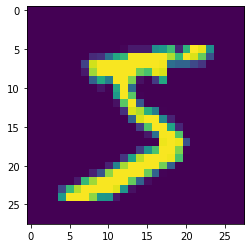

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# view/plot the first element in the training data:
plt.imshow(x_train[0])

In [ ]:
# print the first element in the training data:
print(x_train[0].shape)
print(x_train[0])

The MNIST dataset consists of handwritten digits from 0-9, meaning there are 10 classes. However, we want to use it for some binary classification in these exercises, so we'll make a dataset consisting only of the digits 0 and 1:

In [ ]:
x_train_new, y_train_new = x_train[(y_train==0) | (y_train==8)], y_train[(y_train==0) | (y_train==8)]
x_test_new, y_test_new = x_test[(y_test==0) | (y_test==8)], y_test[(y_test==0) | (y_test==8)]
print("now we only have the labels 0 and 8 in our data: ",y_train_new[:10]) 
y_train_new = np.array([1 if i==8 else i for i in y_train_new])
y_test_new = np.array([1 if i==8 else i for i in y_test_new])
print("now we only have the labels 0 and 8 in our data but we change 8 to label 1 for binary prediction: ",y_train_new[:10]) 

now we only have the labels 0 and 8 in our data:  [0 8 0 8 0 0 8 8 0 8]
now we only have the labels 0 and 8 in our data but we change 8 to label 1 for binary prediction:  [0 1 0 1 0 0 1 1 0 1]


We also want to flatten the images. Flattening means that we are making a multi-dimensional matrix one-dimensional.

In [ ]:
x_train_new = x_train_new.reshape((-1, 784)) 
x_test_new = x_test_new.reshape((-1, 784))
print("After taking a subset of the data and flattening:")
print("x_train shape:", x_train_new.shape) # i.e. 12665 vectors (training samples) of length 784!

After taking a subset of the data and flattening:
x_train shape: (11774, 784)


Since we want some validation data as well, we split our training data in two parts and check the new sizes: 

In [ ]:
x_train_new, X_val, y_train_new, y_val = train_test_split(x_train_new, y_train_new, test_size=0.5)
print("x_train shape:", x_train_new.shape)
print("x_val shape:", X_val.shape)
print("x_test shape:", x_test_new.shape)

x_train shape: (5887, 784)
x_val shape: (5887, 784)
x_test shape: (1954, 784)


## 3.1 The sequential model

There are two ways to write models in Keras: by using the *sequential* or the *functional* API. The sequential model may be more intiuitive or easy to read, but the functional has (unsurprisingly) more functionality/flexibility. We'll start be introducing you to the sequential model, but for the remainder of the course, you will be asked to use the functional API.

**3.1.1**: Read the first four sections in the documentation for the sequential model https://keras.io/guides/sequential_model/. 

**3.1.2**: In the below cell we have defined a simple fully-connected (i.e. *dense*) neural network. Do you recoginize the model? Knowing what the `Dense` layer is, and what the `Sigmoid` activation does (from the documentation), can you then guess what this model may also be called?

**3.1.3**: Why is input_shape specified as (784,)?

In [ ]:
# a simple fully-connected neural network

model = keras.Sequential(
    [
        layers.Dense(1, activation="sigmoid", input_shape=(784,))
    ]
)

**3.1.4**: To train a model in Keras, you need at least two steps: firstly, you `compile` the model and secondly, you `fit` the compiled model. Below we have written these two steps for you for reference. Please read the comments.


When a model has been `fit`, you can evaluate it on test data. You can use the `evaluate` function (writing model.evaluate(X,y)) to evaluate the model directly, given your test data, and/or you can use the `predict` function (model.predict(X)) to retrieve the predictions and envestigate these. Use both the evaluate and predict function below with x_test_new and y_test_new.

In [ ]:
# Steps needed to train and test a model

# Before fitting/training your model in Keras, you need to firstly "compile" it. Here you specify the optimizer, loss function and evalution metric(s) you want to use.
model.compile(optimizer='sgd', loss='binary_crossentropy') 

# Then you are ready to train/fit your model. 
model.fit(x_train_new, y_train_new, epochs=3)
# You can give the fitting process a name to be able to access information such as the loss at each epoch later on. In this case, you would instead write:
# history = model.fit(x_train_new, y_train_new, epochs=3)


Epoch 1/3
184/184 [==============================] - 0s 931us/step - loss: 0.0748
Epoch 2/3
184/184 [==============================] - 0s 994us/step - loss: 0.0718
Epoch 3/3
184/184 [==============================] - 0s 1ms/step - loss: 0.0628


In [ ]:
loss = # your code here
print(loss)

predictions = #your code
print("The first ten predictions:",predictions[:10])

In [ ]:
# results may differ

62/62 [==============================] - 0s 925us/step - loss: 0.0535
0.053522929549217224
The first ten predictions: [[1.23181939e-03]
 [3.04135978e-02]
 [1.50713027e-02]
 [5.41865826e-04]
 [9.27537680e-03]
 [1.65422857e-01]
 [8.89950275e-01]
 [1.09550655e-02]
 [3.00538540e-03]
 [9.81952667e-01]]


**3.1.5**: Now it is your turn to define a model and train it from scratch. Do the following:
- Copy the model above and paste it to the cell below. Change the name of the model to model2.
- Add one Dense layer before the current layer. This makes it a **multi-layer perceptron**! Use any number of units/neurons you think is appropriate. But make sure to specify your input shape(s) correctly (or, at least not wrongly)! If you are having trouble with dimensions, this might help: https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc 
- Compile, fit and evaluate your new model2, but this time add `metrics="binary_accuracy"` to the compile function. When you evaluate your model now, you should get two outputs; a loss and an accuracy. Also, give your fitting process a name such as "history" and change the number of epochs to 10 or more.
- Plot the loss over each epochs by accesing the "history" object you defined when fitting. Hint: `history.history` returns a dictionary. Get the loss values from the dictionary.



In [ ]:
# your code here

Epoch 1/10
184/184 [==============================] - 1s 2ms/step - loss: 0.2961 - binary_accuracy: 0.8934
Epoch 2/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0775 - binary_accuracy: 0.9822
Epoch 3/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0545 - binary_accuracy: 0.9854
Epoch 4/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0472 - binary_accuracy: 0.9876
Epoch 5/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0393 - binary_accuracy: 0.9871
Epoch 6/10
184/184 [==============================] - 0s 2ms/step - loss: 0.0384 - binary_accuracy: 0.9870
Epoch 7/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0376 - binary_accuracy: 0.9884
Epoch 8/10
184/184 [==============================] - 0s 1ms/step - loss: 0.0303 - binary_accuracy: 0.9918
Epoch 9/10
184/184 [==============================] - 0s 2ms/step - loss: 0.0302 - binary_accuracy: 0.9907
Epoch 10/10
62/62 [==================

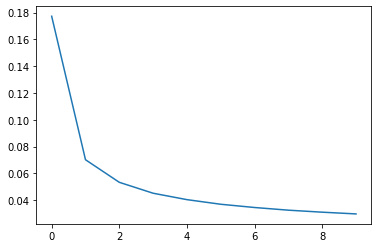

In [ ]:
# results may diifer

**3.1.6**: Now, take a look at the model defined below. What is the number of trainable parameters of "example_model"? Explain the number of parameters (weights and biases) for each layer. Note that, so far, you have only been shown feed-forward neural networks (the Dense layer is a feed-forward layer). *Hint: you may want to look into the model.summary() method to verify your calculation.*


In [ ]:
example_model = keras.Sequential(
    [
        layers.Dense(32, input_shape=(1,), activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

**OPTIONAL 3.1.7**: In the documentation you can see that you can also "create a Sequential model incrementally via the `add()` method". Re-write "example_model" using the `add` method.



In [ ]:
# Your code here

## 3.2 The functional model 
Now we will practice writting models with the functional API, which we will continue with further on. In terms of syntax, you will only see a difference when defining the models, meaning that the training and evaluation steps (`compile`, `fit` and `evalute`/`predict`) are the same no matter which API, the sequential or functional, you are using.

**3.2.1**: Read the first three sections of the documentation https://keras.io/guides/functional_api/

**3.2.2**: Re-write "example_model" using the functional API and name it model3. Change the input shape such that we can use the model with our MNIST data (784,).

**3.2.3**: Compile, fit and evaluate model3, but this time add the validation data, X_val and y_val, to the `validation_data` argument in `fit`. The argument expects a tuple (see https://keras.io/api/models/model_training_apis/#fit-method).

**3.2.4** Plot loss and validation accuracy (`'val_binary_accuracy'`).

In [ ]:
# your code here